Loading Dataset & Libraries

In [1]:
#IMPORTING ESSENTIAL LIBRARIES

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#LOADING THE DATASET

org_df = pd.read_csv(r"C://Users//lalli//Desktop//Steel Industry energy consumption project//Steel_industry_data.csv")

In [6]:
#DATASET 

org_df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_KVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [5]:
#RENAMING few columns as they are incorrect.

org_df = org_df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh':'Lagging_Current_Reactive_Power_KVarh',
                                 'CO2(tCO2)': 'CO2'})

Data Preprocessing(EDA)

In [7]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_KVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [8]:
org_df.columns 

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_KVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [9]:
len(org_df.columns)

11

In [11]:
org_df.shape

(35040, 11)

In [12]:
org_df.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_KVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [13]:
print("MAX Energy used: ",org_df.Usage_kWh.max())
print("MIN Energy used: ",org_df.Usage_kWh.min())
print("AVG Energy used: ",org_df.Usage_kWh.mean())


MAX Energy used:  157.18
MIN Energy used:  0.0
AVG Energy used:  27.386892408677415


In [14]:
org_df.isna().sum()  #there no missing data in the Dataset

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive_Power_KVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2                                     0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [15]:
org_df.corr()  #Correlation matrix

,Usage_kWh,Lagging_Current_Reactive_Power_KVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive_Power_KVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


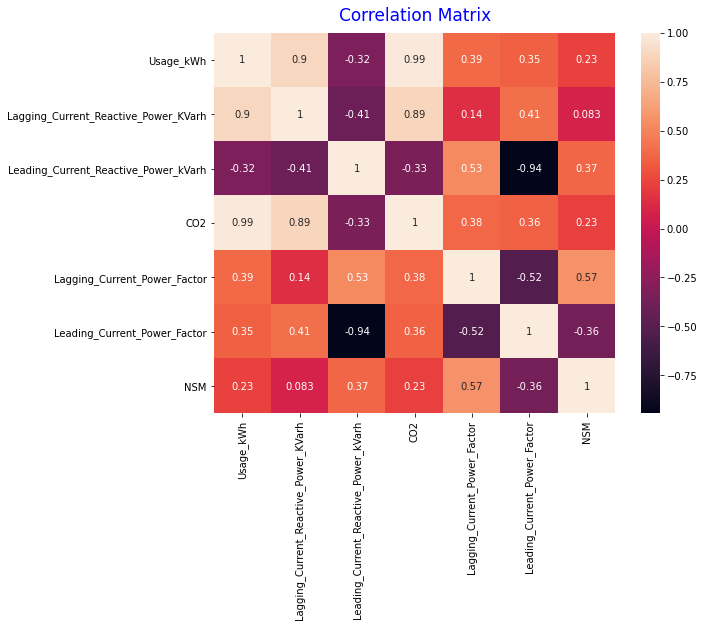

In [16]:
#DATA VISUALIZATION

plt.figure(figsize = (9,7))
sns.heatmap(org_df.corr(),annot = True)
plt.title("Correlation Matrix", fontsize = 17, pad = 12, loc = 'center', color = 'b')
plt.show()

In [17]:
mst_eng_cnmpt = pd.pivot_table(org_df,index = 'date', values = 'Usage_kWh'
                              , aggfunc={'Usage_kWh':np.max})

In [18]:
mst_eng_cnmpt

,Usage_kWh
date,
01/01/2018 00:00,3.42
01/01/2018 00:15,3.17
01/01/2018 00:30,4.00
01/01/2018 00:45,3.24
01/01/2018 01:00,3.31
...,...
31/12/2018 22:45,3.82
31/12/2018 23:00,3.85
31/12/2018 23:15,3.74


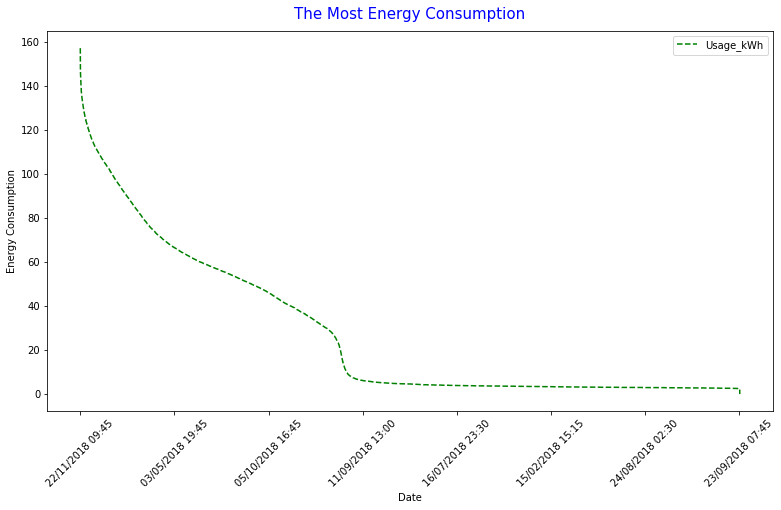

In [19]:
plt.rcParams['figure.figsize'] = (13,7)
graph_1 = mst_eng_cnmpt[:35040].sort_values(by = 'Usage_kWh', ascending = False).plot(color='green', linestyle='dashed')
graph_1.set_xticklabels(graph_1.get_xticklabels(), rotation = 45)
plt.title('The Most Energy Consumption', fontsize = 15, color = 'b', loc = 'center', pad = 12)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

In [20]:
Year=[]
for i in range(35040):
    Year.append(org_df.date.values[1][6:10])
new_set = set(Year)
print(new_set)                         #data belongs to the year 2018.

{'2018'}


Text(0.5, 1.0, 'pairplot')

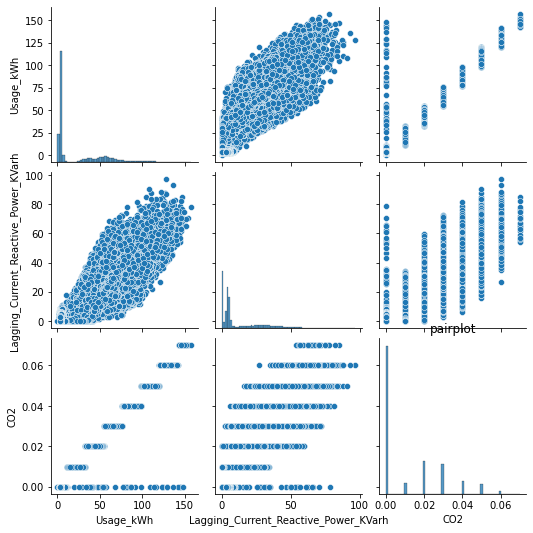

In [22]:
sns.pairplot(org_df, x_vars=["Usage_kWh", "Lagging_Current_Reactive_Power_KVarh", "CO2"],
    y_vars=["Usage_kWh", "Lagging_Current_Reactive_Power_KVarh", "CO2"])
plt.title("pairplot")

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Usage Distribution')

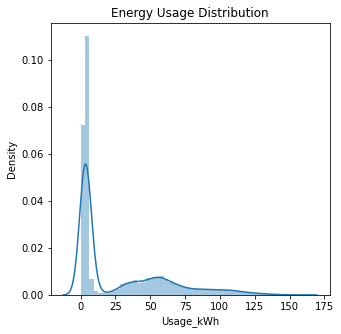

In [23]:
plt.rcParams['figure.figsize'] = (5,5)
sns.distplot(org_df["Usage_kWh"])
plt.title("Energy Usage Distribution")

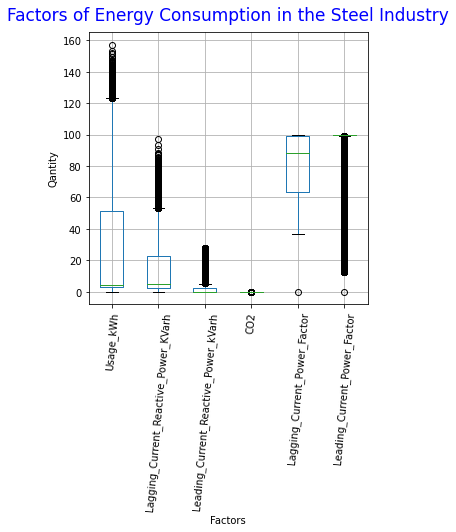

In [25]:
#box-plot to find out the outliers
graph_2 = org_df.boxplot(column = ['Usage_kWh', 'Lagging_Current_Reactive_Power_KVarh', 'Leading_Current_Reactive_Power_kVarh',
                    'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor'])
graph_2.set_xticklabels(graph_2.get_xticklabels(), rotation = 85)
plt.title('Factors of Energy Consumption in the Steel Industry', fontsize = 17, color = 'b', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Qantity')
plt.show()

Text(0.5, 0, 'NSM')

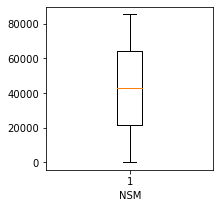

In [26]:
plt.rcParams['figure.figsize'] = (3,3)
plt.boxplot(org_df["NSM"])
plt.xlabel('NSM')   #as it is having higher values


In [27]:
#analyzing energy consumption(usage) and NSM(Number of Seconds from midnight Continuous) 
#based on load type, day of week and week status

pd.pivot_table(org_df, index = ['Load_Type', 'Day_of_week', 'WeekStatus'], values = ['NSM', 'Usage_kWh','Lagging_Current_Reactive_Power_KVarh'], 
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean,'Lagging_Current_Reactive_Power_KVarh' : np.mean})

Lagging_Current_Reactive_Power_KVarh  \
Load_Type    Day_of_week WeekStatus                                         
Light_Load   Friday      Weekday                                 9.553011   
             Monday      Weekday                                 7.635354   
             Saturday    Weekend                                 5.402193   
             Sunday      Weekend                                 2.848329   
             Thursday    Weekday                                 9.785036   
             Tuesday     Weekday                                 8.754484   
             Wednesday   Weekday                                 8.924911   
Maximum_Load Friday      Weekday                                27.883983   
             Monday      Weekday                                31.238475   
             Saturday    Weekend                                12.151787   
             Sunday      Weekend                                 6.993750   
             Thursday    Weekday                                30.186850   
             Tuesday     Weekday                                30.360357   
             Wednesday   Weekday                                28.609770   
Medium_Load  Friday      Weekday                                16.243713   
             Monday      Weekday                                16.871163   
             Saturday    Weekend                                 4.066316   
             Sunday      Weekend                                 3.293346   
             Thursday    Weekday                                18.107287   
             Tuesday     Weekday                                17.560740   
             Wednesday   Weekday                                14.984630   

                                              NSM  Usage_kWh  
Load_Type    Day_of_week WeekStatus                           
Light_Load   Friday      Weekday     23206.204380  11.361442  
             Monday      Weekday     24026.223776   8.805459  
             Saturday    Weekend     31381.843575   7.072210  
             Sunday      Weekend     39144.653465   4.171106  
             Thursday    Weekday     23206.204380  11.803964  
             Tuesday     Weekday     24074.199288  10.510040  
             Wednesday   Weekday     24074.199288  10.780560  
Maximum_Load Friday      Weekday     53106.000000  61.043700  
             Monday      Weekday     53106.000000  66.278233  
             Saturday    Weekend     52492.105263  41.529605  
             Sunday      Weekend     52826.470588  29.195662  
             Thursday    Weekday     53106.000000  64.522758  
             Tuesday     Weekday     53176.530612  66.023359  
             Wednesday   Weekday     53176.530612  62.358359  
Medium_Load  Friday      Weekday     61758.000000  42.220494  
             Monday      Weekday     61758.000000  43.097231  
             Saturday    Weekend     62218.421053  17.547648  
             Sunday      Weekend     61967.647059  16.368934  
             Thursday    Weekday     61758.000000  44.986200  
             Tuesday     Weekday     61705.102041  45.020797  
             Wednesday   Weekday     61705.102041  40.462379

Text(0, 0.5, 'Energy Consumption')

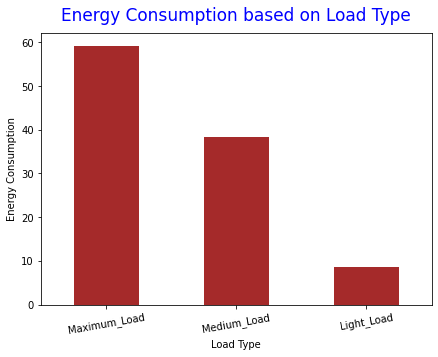

In [28]:
#visualize energy consumption based on load type


plt.rcParams['figure.figsize'] = (7,5)
graph_3 = org_df.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'brown')
graph_3.set_xticklabels(graph_3.get_xticklabels(), rotation = 10)
plt.title('Energy Consumption based on Load Type', fontsize = 17, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption')

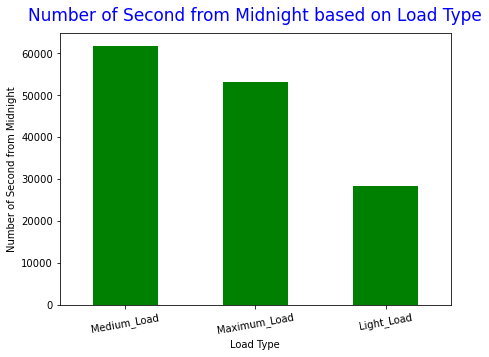

In [29]:
#visualize number of second from midnight based on load type


plt.rcParams['figure.figsize'] = (7,5)
graph_4 = org_df.groupby('Load_Type')['NSM'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'green')
graph_4.set_xticklabels(graph_4.get_xticklabels(), rotation = 10)
plt.title('Number of Second from Midnight based on Load Type', fontsize = 17, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Number of Second from Midnight')
plt.show()                                       #approx:17hrs

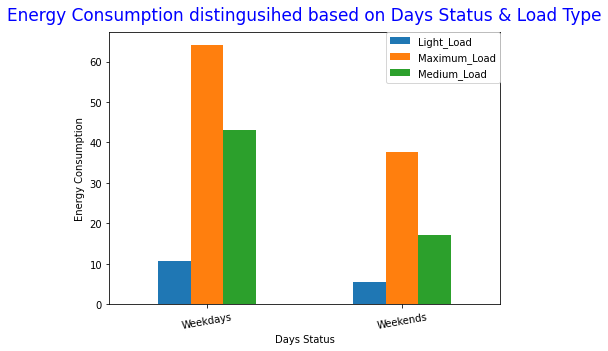

In [30]:
#visualize energy consumption based on week status and load type


plt.rcParams['figure.figsize'] = (7,5)
graph_5 = org_df.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
graph_5.set_xticklabels(["Weekdays","Weekends"], rotation = 10)
plt.title('Energy Consumption distingusihed based on Days Status & Load Type', fontsize = 17, pad = 12, color = 'b')
plt.xlabel('Days Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1, 1), borderaxespad = 0)
plt.show()

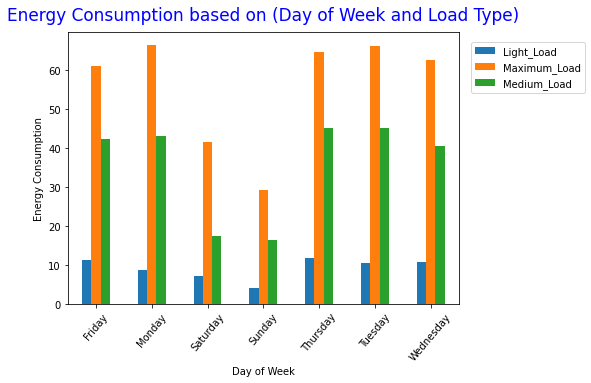

In [31]:
#visualize energy consumption based on day of week and load type


graph_6 = org_df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
graph_6.set_xticklabels(graph_6.get_xticklabels(), rotation = 50)
plt.title('Energy Consumption based on (Day of Week and Load Type)', fontsize = 17, pad = 12, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.005, 1), borderaxespad = 1)
plt.show()

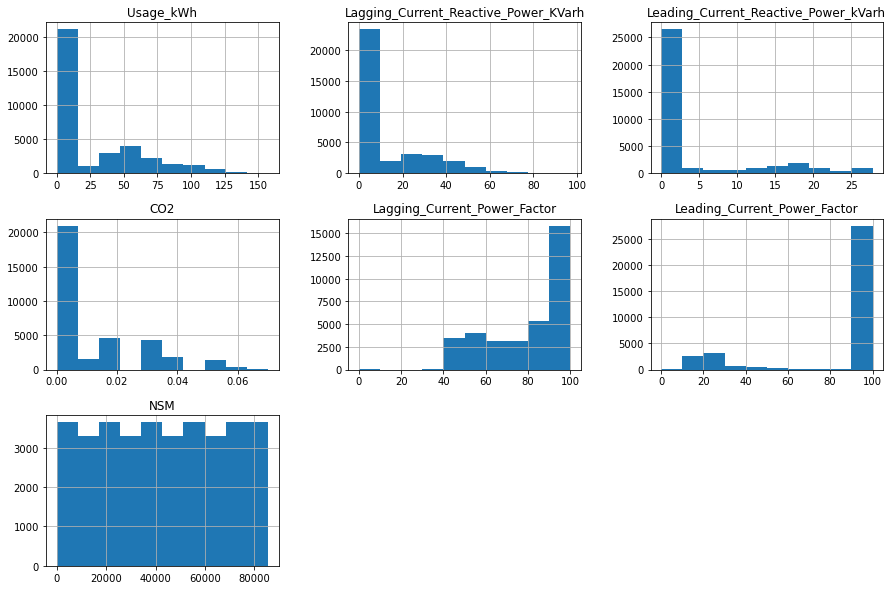

In [32]:
#distribution of each variable(Histogram(Frequency graphs))


org_df.hist(figsize = (15,10))
plt.show()

In [33]:
#MODEL TRAINING

In [36]:
#Scaling downing and normalizing the numarical values 


from sklearn import preprocessing  
org_df[['Usage_kWh', 'Lagging_Current_Reactive_Power_KVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']]=preprocessing.normalize(org_df[['Usage_kWh', 'Lagging_Current_Reactive_Power_KVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']])

In [37]:
org_df = org_df.set_index('date')

#handling categorical data
org_df = pd.get_dummies(org_df)  #one-hot encoding splitting the cateorical variables.

In [38]:
org_df

,Usage_kWh,Lagging_Current_Reactive_Power_KVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,,,,
01/01/2018 00:15,0.003489,0.003247,0.000000e+00,0.0,0.080583,0.110071,0.990640,1,0,0,1,0,0,0,0,0,1,0,0
01/01/2018 00:30,0.002217,0.002472,0.000000e+00,0.0,0.037012,0.055432,0.997771,1,0,0,1,0,0,0,0,0,1,0,0
01/01/2018 00:45,0.001199,0.001214,0.000000e+00,0.0,0.026003,0.036999,0.998975,1,0,0,1,0,0,0,0,0,1,0,0
01/01/2018 01:00,0.000919,0.000988,0.000000e+00,0.0,0.018903,0.027762,0.999435,1,0,0,1,0,0,0,0,0,1,0,0
01/01/2018 01:15,0.000849,0.001000,0.000000e+00,0.0,0.014377,0.022214,0.999649,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/12/2018 23:00,0.000046,0.000059,0.000000e+00,0.0,0.000750,0.001208,0.999999,1,0,0,1,0,0,0,0,0,1,0,0
31/12/2018 23:15,0.000045,0.000045,0.000000e+00,0.0,0.000845,0.001195,0.999999,1,0,0,1,0,0,0,0,0,1,0,0
31/12/2018 23:30,0.000045,0.000037,8.274222e-07,0.0,0.000906,0.001182,0.999999,1,0,0,1,0,0,0,0,0,1,0,0


In [39]:
org_df.shape

(35040, 19)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Usage Distribution')

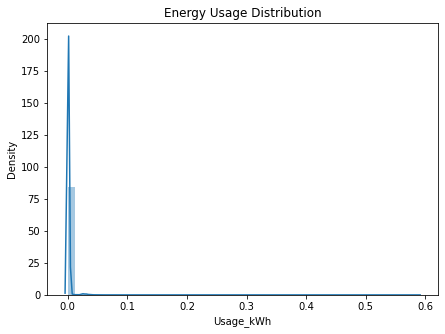

In [40]:
sns.distplot(org_df["Usage_kWh"])
plt.title("Energy Usage Distribution")

In [41]:
org_df.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_KVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
count,35040.000000,35040.000000,35040.000000,3.504000e+04,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,0.001431,0.001089,0.000087,4.532276e-07,0.009566,0.014186,0.989433,0.715068,0.284932,0.142466,0.145205,0.142466,0.142466,0.142466,0.142466,0.142466,0.515753,0.207534,0.276712
std,0.012162,0.008117,0.000781,5.486286e-06,0.054952,0.084609,0.101519,0.451388,0.451388,0.349532,0.352313,0.349532,0.349532,0.349532,0.349532,0.349532,0.499759,0.405547,0.447379
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000111,0.000040,0.000000,0.000000e+00,0.001489,0.001221,0.999984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000369,0.000268,0.000000,0.000000e+00,0.002096,0.002058,0.999995,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.001136,0.000634,0.000043,4.629616e-07,0.002924,0.004630,0.999998,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.586701,0.337163,0.051302,2.833027e-04,0.917092,0.917794,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
from sklearn.model_selection import train_test_split

X = org_df.drop('Usage_kWh', axis = 1)
y = org_df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=200)
X_val,X_test,y_val,y_test = train_test_split(X_test, y_test, test_size = 0.65,random_state=200)


In [153]:
print("Training data split:",X_train.shape,"\t",y_train.shape)
print("Testing data split:  ",X_test.shape,"\t",y_test.shape)
print("Validation data split:",X_val.shape,"\t",y_val.shape)

Training data split: (21024, 18) 	 (21024,)
Testing data split:   (9111, 18) 	 (9111,)
Validation data split: (4905, 18) 	 (4905,)


In [125]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [264]:
#General Mutiple Linear Regression model:

#Training Data:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training Score: ",lr.score(X_train, y_train))
lr_train_acc = lr.score(X_train, y_train)

Training Score:  0.9879178215797101


In [265]:
#Testing Data:
print("Testing Score: ",lr.score(X_test, y_test))
lr_test_acc = lr.score(X_test, y_test) 

Testing Score:  0.9912878467877625


In [266]:
#Validation Score:
y_v_pred = lr.predict(X_val)
print("Validation Score: ",lr.score(X_val, y_v_pred))
lr_val_acc = lr.score(X_val, y_v_pred)

Validation Score:  1.0


In [157]:
#slope and Intercept
print("Intercept: ", lr.intercept_)
print("Slope: ",lr.coef_)

Intercept:  0.0057199347163481296
Slope:  [ 3.63087518e-01 -3.59818751e-01  1.55854888e+03  5.16362864e-02
 -2.08987925e-02 -5.62161223e-03  8.90619149e-06 -8.94152890e-06
  2.88938896e-05 -3.65135505e-06 -6.49453303e-06 -2.43681230e-06
  5.58903854e-06 -4.09013439e-05  1.89738398e-05 -2.09203435e-05
  7.45869064e-06  1.34889882e-05]


In [267]:
import math
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, lr.predict(X_test)))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, lr.predict(X_test)))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))))

lr_mae = metrics.mean_absolute_error(y_test, lr.predict(X_test))
lr_mse = metrics.mean_squared_error(y_test, lr.predict(X_test))
lr_rmse =  math.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test)))

Mean Absolute Error :  0.00014424659615582094
Mean Squared Error :  1.2981514185486945e-06
Root Mean Squared Error :  0.0011393644801154258


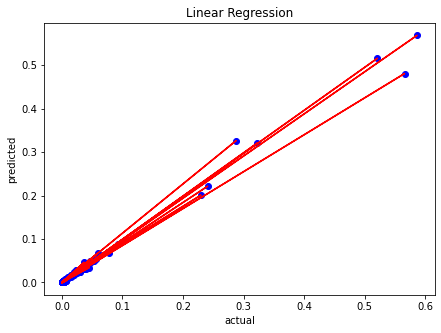

In [268]:
plt.scatter(y_test,lr.predict(X_test),color = 'blue')
 
plt.plot(y_test, lr.predict(X_test), color = 'red')
plt.title('Linear Regression')
plt.xlabel('actual')
plt.ylabel('predicted')
 
plt.show()

In [269]:
#Polynomial Regression:

from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree =2)
X_tr_poly = poly.fit_transform(X_train)
poly.fit(X_tr_poly, y_train)

lin2 = LinearRegression()
lin2.fit(X_tr_poly, y_train)
print("Training Score: ",lin2.score(X_tr_poly, y_train))

lin2_train_acc = lin2.score(X_tr_poly, y_train)

Training Score:  0.9997465375632968


In [270]:
#Testing data:
X_te_poly = poly.fit_transform(X_test)
print("Testing Score: ",lin2.score(X_te_poly, y_test))

lin2_test_acc = lin2.score(X_te_poly, y_test)

Testing Score:  0.9995513390961455


In [272]:
#confirmation with r2_score.  
y_pred_poly = lin2.predict(X_te_poly)
print("Testing Score: ",metrics.r2_score(y_test, y_pred_poly))

Testing Score:  0.9995513390961455


In [273]:
#VALIDATION

X_V_poly = poly.fit_transform(X_val)
print("Validation Score: ",lin2.score(X_V_poly, y_val))
y_pred_V_poly = lin2.predict(X_V_poly)
print("validation Score: ",metrics.r2_score(y_val, y_pred_V_poly))

lin2_val_acc = metrics.r2_score(y_val, y_pred_V_poly)

Validation Score:  0.9993045476934791
validation Score:  0.9993045476934791


In [274]:
import math
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred_poly))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred_poly))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

lin2_mae = metrics.mean_absolute_error(y_test, y_pred_poly)
lin2_mse = metrics.mean_squared_error(y_test, y_pred_poly)
lin2_rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))

Mean Absolute Error :  7.809327355517641e-05
Mean Squared Error :  6.685256498565161e-08
Root Mean Squared Error :  0.0002585586296870627


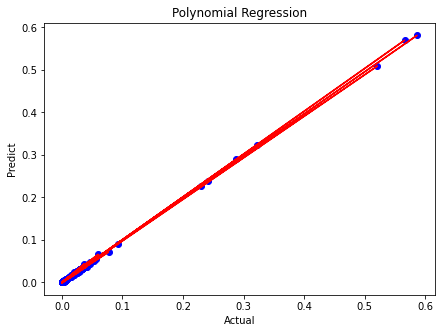

In [275]:
plt.scatter(y_test, y_pred_poly, color = 'blue')
 
plt.plot(y_test, y_pred_poly, color = 'red')
#plt.plot(X_train, y_train, "b.",label='Training points')
#plt.plot(X_te_poly, y_pred_poly, color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Actual')
plt.ylabel('Predict')
 
plt.show()

In [276]:
print(lin2.intercept_)
print(lin2.coef_)

68396.27833371339
[-8.00700687e-03  5.51555542e+03  5.00418462e+03  6.83789983e+03
 -2.37378439e+05 -2.64459250e+04  1.22943414e+07 -3.86345992e+04
  2.99185500e+04 -1.26829190e+04  1.25218571e+04  1.51705142e+04
  1.57153628e+04 -2.03147048e+04  2.39535601e+03  2.36240149e+04
  2.31702504e+04  5.21892751e+04 -1.00779632e+05 -2.35952609e+00
 -3.78750751e+01 -1.53451961e+02  1.72581922e+00 -1.19208996e+00
 -4.62891253e-01 -1.19712604e+04 -2.24944804e+03  6.25244632e+03
  6.25245829e+03 -3.46929712e+03 -3.46936306e+03  6.25254633e+03
  6.25251181e+03  6.25249343e+03  2.04193807e+02  2.03875747e+02
  2.03996410e+02  3.77779057e+01  5.22337922e+05 -1.10241387e+01
  8.73492319e-01 -6.67904035e+00 -1.26943655e+03 -2.12243825e+03
 -4.33197705e+02 -4.33246979e+02  4.19716683e+02  4.19749736e+02
 -4.33342851e+02 -4.33342873e+02 -4.33311798e+02 -3.29504963e+03
 -3.29606838e+03 -3.29504650e+03 -1.79379905e+06  2.89786749e+02
 -1.91453178e+03 -4.01504451e+02 -2.87441600e+03 -2.53519708e+03
 -7.167

In [277]:
#Decision Tree Regressor:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(max_depth = 7,random_state = 200) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
print("Training Score: ",regressor.score(X_train,y_train))

regressor_train_acc = regressor.score(X_train,y_train)

Training Score:  0.9986969350082858


In [278]:
#Testing data:

y_dtr_pred = regressor.predict(X_test)
print("Testing Score: ",regressor.score(X_test,y_test))
print("Testing Score: ",metrics.r2_score(y_test,y_dtr_pred))

regressor_test_acc = regressor.score(X_test,y_test)

Testing Score:  0.9902899017959003
Testing Score:  0.9902899017959003


In [280]:
#Validation data:

y_dtr_V_pred = regressor.predict(X_val)
print("Testing Score: ",regressor.score(X_val,y_val))
print("Testing Score: ",metrics.r2_score(y_val,y_dtr_V_pred))

regressor_val_acc = regressor.score(X_val,y_val)

Testing Score:  0.9921872821713136
Testing Score:  0.9921872821713136


In [283]:
import math
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test,y_dtr_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test,y_dtr_pred))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test,y_dtr_pred)))

regressor_mae = metrics.mean_absolute_error(y_test,y_dtr_pred)
regressor_mse = metrics.mean_squared_error(y_test,y_dtr_pred)
regressor_rmse =  math.sqrt(metrics.mean_squared_error(y_test,y_dtr_pred))

Mean Absolute Error :  0.00022858249820812044
Mean Squared Error :  1.4468498717622812e-06
Root Mean Squared Error :  0.0012028507271321248


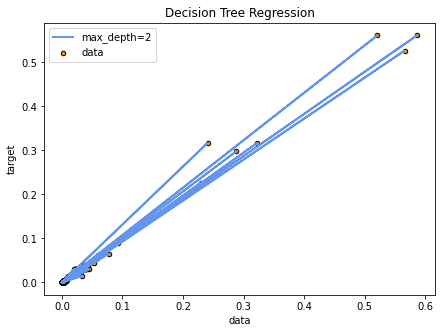

In [281]:
plt.figure()
plt.scatter(y_test, y_dtr_pred, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(y_test, y_dtr_pred, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [285]:
#ENSEMBLED MODEL Stacking Regressor

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

estimator_list = [
        ('lr',lr),
        ('lin2',lin2),
        ('regressor',regressor) ]

stack_model = StackingRegressor(estimators=estimator_list,final_estimator=RandomForestRegressor(n_estimators=23,random_state=150))

In [286]:
stack_model.fit(X_train,y_train)
print("Training Score: ",stack_model.score(X_train,y_train))

stack_train_acc = stack_model.score(X_train,y_train)

Training Score:  0.9917513688011506


In [287]:
#Testing Data:

y_stack_pred = stack_model.predict(X_test)
print("Testing Score: ",stack_model.score(X_test,y_test))
print("Testing Score: ",metrics.r2_score(y_test,y_stack_pred))

stack_test_acc = stack_model.score(X_test,y_test)

Testing Score:  0.9977120344666668
Testing Score:  0.9977120344666668


In [288]:
#Validation data:

y_stk_V_pred = stack_model.predict(X_val)
print("Testing Score: ",stack_model.score(X_val,y_val))
print("Testing Score: ",metrics.r2_score(y_val,y_stk_V_pred))

stack_val_acc = stack_model.score(X_val,y_val)

Testing Score:  0.9906164963514872
Testing Score:  0.9906164963514872


In [291]:
import math
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test,y_stack_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test,y_stack_pred))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test,y_stack_pred)))

stack_mae = metrics.mean_absolute_error(y_test,y_stack_pred)
stack_mse = metrics.mean_squared_error(y_test,y_stack_pred)
stack_rmse =  math.sqrt(metrics.mean_squared_error(y_test,y_stack_pred))

Mean Absolute Error :  0.00011780281646258742
Mean Squared Error :  3.4091752409898515e-07
Root Mean Squared Error :  0.0005838814298288525


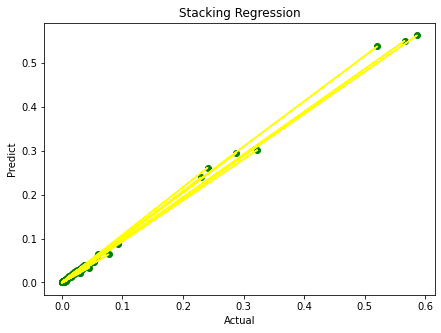

In [351]:
plt.scatter(y_test, y_stack_pred, color = 'green')
 
plt.plot(y_test, y_stack_pred, color = 'yellow')
#plt.plot(y_train, y_train, "b.",label='Training points')
#plt.plot(X_te_poly, y_pred_poly, color = 'red')
plt.title('Stacking Regression')
plt.xlabel('Actual')
plt.ylabel('Predict')
 
plt.show()

In [298]:
#traning acc of all models

acc_train_lst = {
    'Multiple Linear Regression':lr_train_acc,
    'Polynomial Regression':lin2_train_acc,
    'Decision Tree Regressor':regressor_train_acc
}

acc_test_lst = {
    'Multiple Linear Regression':lr_test_acc,
    'Polynomial Regression':lin2_test_acc,
    'Decision Tree Regressor':regressor_test_acc
}

acc_val_lst = {
    'Multiple Linear Regression':lr_val_acc,
    'Polynomial Regression':lin2_val_acc,
    'Decision Tree Regressor':regressor_val_acc
}


err_mae = {
    'Multiple Linear Regression':lr_mae,
    'Polynomial Regression':lin2_mae,
    'Decision Tree Regressor':regressor_mae
}

err_mse = {
    'Multiple Linear Regression':lr_mse,
    'Polynomial Regression':lin2_mse,
    'Decision Tree Regressor':regressor_mse
}

err_rmse = {
    'Multiple Linear Regression':lr_rmse,
    'Polynomial Regression':lin2_rmse,
    'Decision Tree Regressor':regressor_rmse
}



In [304]:
tra_df = pd.DataFrame.from_dict(acc_train_lst, orient = 'index' , columns=['r2score Training'])
tes_df = pd.DataFrame.from_dict(acc_test_lst, orient = 'index' , columns=['r2score Testing'])
val_df = pd.DataFrame.from_dict(acc_val_lst , orient = 'index' , columns=['r2score Validation'])
mae_df = pd.DataFrame.from_dict(err_mae, orient = 'index' , columns=['MAE'])
mse_df = pd.DataFrame.from_dict(err_mse, orient = 'index' , columns=['MSE'])
rmse_df = pd.DataFrame.from_dict(err_rmse, orient = 'index' , columns=['RMSE'])
compare_df = pd.concat([tra_df, tes_df, val_df, mae_df, mse_df, rmse_df], axis=1)
compare_df

,r2score Training,r2score Testing,r2score Validation,MAE,MSE,RMSE
Multiple Linear Regression,0.987918,0.991288,1.000000,0.000144,1.298151e-06,0.001139
Polynomial Regression,0.999747,0.999551,0.999305,0.000078,6.685256e-08,0.000259
Decision Tree Regressor,0.998697,0.990290,0.992187,0.000229,1.446850e-06,0.001203


In [313]:
en_data = {'r2score Training':stack_train_acc,'r2score Testing':stack_test_acc,'r2score Validation':stack_val_acc,
           'MAE':stack_mae,'MSE':stack_mse,'RMSE':stack_rmse }
ensem_df = pd.DataFrame(en_data, index =['Stacking Regressor(ENSEMBLED)'])
ensem_df

,r2score Training,r2score Testing,r2score Validation,MAE,MSE,RMSE
Stacking Regressor(ENSEMBLED),0.991751,0.997712,0.990616,0.000118,3.409175e-07,0.000584


In [328]:
from sklearn.model_selection import KFold,cross_val_score
kfold1=KFold(10)
scores=cross_val_score(lr, X_train, y_train, cv=kfold1)
print(scores)
print (np.mean(scores))

[0.98116532 0.9828777  0.98790612 0.98945737 0.98922095 0.9963197
 0.98822878 0.98969387 0.93918862 0.9893236 ]
0.9833382031389982


In [331]:
from sklearn.model_selection import KFold,cross_val_score
kfold1=KFold(10)
scores=cross_val_score(lin2, X_train, y_train, cv=kfold1)
print(scores)
print (np.mean(scores))

[0.98116532 0.9828777  0.98790612 0.98945737 0.98922095 0.9963197
 0.98822878 0.98969387 0.93918862 0.9893236 ]
0.9833382031389982


In [332]:
from sklearn.model_selection import KFold,cross_val_score
kfold1=KFold(10)
scores=cross_val_score(regressor, X_train, y_train, cv=kfold1)
print(scores)
print (np.mean(scores))

[0.77350665 0.97517297 0.99345695 0.99719318 0.9754549  0.99133498
 0.97243875 0.99837398 0.9684845  0.97859178]
0.9624008644648194


In [334]:
from sklearn.model_selection import KFold,cross_val_score
kfold1=KFold(10)
scores=cross_val_score(stack_model, X_train, y_train, cv=kfold1)
print(scores)
print (np.mean(scores))

[0.99652209 0.98803119 0.98770674 0.98545298 0.9938258  0.99402305
 0.98942225 0.9976252  0.95226254 0.99378337]
0.9878655190218604


In [329]:
from sklearn.model_selection import KFold,cross_val_score
kfold1=KFold(10)
scores=cross_val_score(lr, X_test, y_test, cv=kfold1)
print(scores)
print (np.mean(scores))

[0.98990733 0.99652982 0.99304328 0.99744409 0.98707631 0.99312955
 0.98904638 0.98706372 0.97810941 0.99331441]
0.9904664288580728


In [350]:
from sklearn.model_selection import KFold,cross_val_score
kfold1=KFold(10)
scores=cross_val_score(lin2, X_test, y_test, cv=kfold1)
print(scores)
print (np.mean(scores))

[0.98990733 0.99652982 0.99304328 0.99744409 0.98707631 0.99312955
 0.98904638 0.98706372 0.97810941 0.99331441]
0.9904664288580728


In [336]:
from sklearn.model_selection import KFold,cross_val_score
kfold1=KFold(10)
scores=cross_val_score(regressor, X_test, y_test, cv=kfold1)
print(scores)
print (np.mean(scores))

[0.97448488 0.97673808 0.97918624 0.99048223 0.97821964 0.95268333
 0.86387837 0.9583304  0.99267895 0.97826748]
0.9644949590156842


In [337]:
from sklearn.model_selection import KFold,cross_val_score
kfold1=KFold(10)
scores=cross_val_score(stack_model, X_test, y_test, cv=kfold1)
print(scores)
print (np.mean(scores))

[0.95216791 0.98883361 0.99529899 0.99728571 0.98572963 0.99016707
 0.98326457 0.98685034 0.99467454 0.99218719]
0.9866459563203765


In [330]:
from sklearn.model_selection import KFold,cross_val_score
kfold1=KFold(10)
scores=cross_val_score(lr, X_val, y_val, cv=kfold1)
print(scores)
print (np.mean(scores))

[0.99940033 0.99032343 0.97582177 0.96269139 0.95910588 0.98662468
 0.99462549 0.96776188 0.98444538 0.98447544]
0.9805275649786325


In [338]:
from sklearn.model_selection import KFold,cross_val_score
kfold1=KFold(10)
scores=cross_val_score(lin2, X_val, y_val, cv=kfold1)
print(scores)
print (np.mean(scores))

[0.99940033 0.99032343 0.97582177 0.96269139 0.95910588 0.98662468
 0.99462549 0.96776188 0.98444538 0.98447544]
0.9805275649786325


In [343]:
from sklearn.model_selection import KFold,cross_val_score
kfold1=KFold(15)
scores=cross_val_score(regressor, X_val, y_val, cv=kfold1)
print(scores)
print (np.mean(scores))

[0.9307361  0.98167952 0.98331958 0.96797719 0.7690121  0.9604751
 0.90795172 0.97600074 0.95179642 0.96344842 0.98797311 0.87621908
 0.95681417 0.96038078 0.91791866]
0.9394468465610405


In [349]:
from sklearn.model_selection import KFold,cross_val_score
kfold1=KFold(15)
scores=cross_val_score(stack_model, X_val, y_val, cv=kfold1)
print(scores)
print (np.mean(scores))

[0.96689272 0.98385941 0.99158154 0.97433595 0.85384727 0.9713833
 0.95100109 0.98483521 0.84487213 0.984152   0.99608322 0.96888333
 0.97773644 0.98872231 0.98873493]
0.9617947234309013
